# AFS Analytics Deep Learning and Python Training

## Exercise 1. My First Network
In this exercises we will work through neural networks using Keras



In [ ]:
#no need to run if using colab
#!pip install tensorflow numpy mnist

##Exercise 1. MNIST digit classification
Let's import packages

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)




2.4.1


Data preparation: collection, train/test split, preprocessing (0-1 normalization)

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


This guide uses the Fashion MNIST dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here: https://github.com/zalandoresearch/fashion-mnist

Loading the dataset returns four NumPy arrays:

* The train_images and train_labels arrays are the training set—the data the model uses to learn.
* The model is tested against the test set, the test_images, and test_labels arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents:

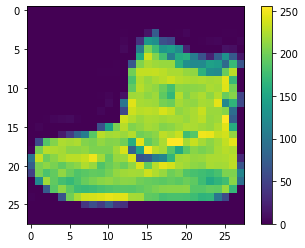

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Explore the data

Size and labels


In [5]:
print(train_images.shape)
print(len(train_labels))
print(train_labels)

(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]


Normalize the data to avoid unnecessary dynamic range

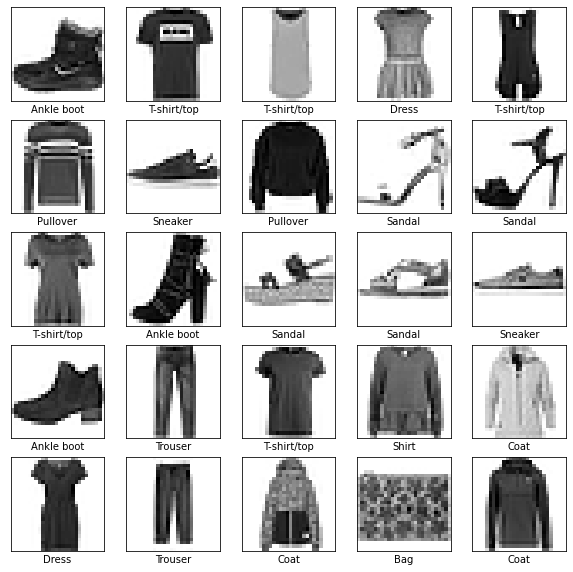

In [7]:
train_images = train_images / 255.0

test_images = test_images / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Set up the network

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

Set up the optimizer and loss

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Train the model

In [11]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 2ms/step - loss: 1.5031 - accuracy: 0.5480
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6749 - accuracy: 0.7569
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5801 - accuracy: 0.7895
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5326 - accuracy: 0.8123
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4998 - accuracy: 0.8227
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4850 - accuracy: 0.8302
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4599 - accuracy: 0.8369
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4497 - accuracy: 0.8421
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4379 - accuracy: 0.8474
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.431

Evaluate the model

In [12]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.4593 - accuracy: 0.8328

Test accuracy: 0.8327999711036682


Make predictions

In [13]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

print(predictions[0])
#class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
#               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


[6.1966784e-07 2.9749273e-08 6.2083518e-06 6.5032391e-06 8.1732642e-06
 1.3789420e-01 1.8699173e-05 3.3069733e-01 3.9002618e-03 5.2746797e-01]


Seeing the actual label

In [ ]:
np.argmax(predictions[0])

9

Visualize results

In [14]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')





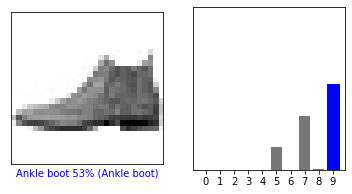

In [15]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()




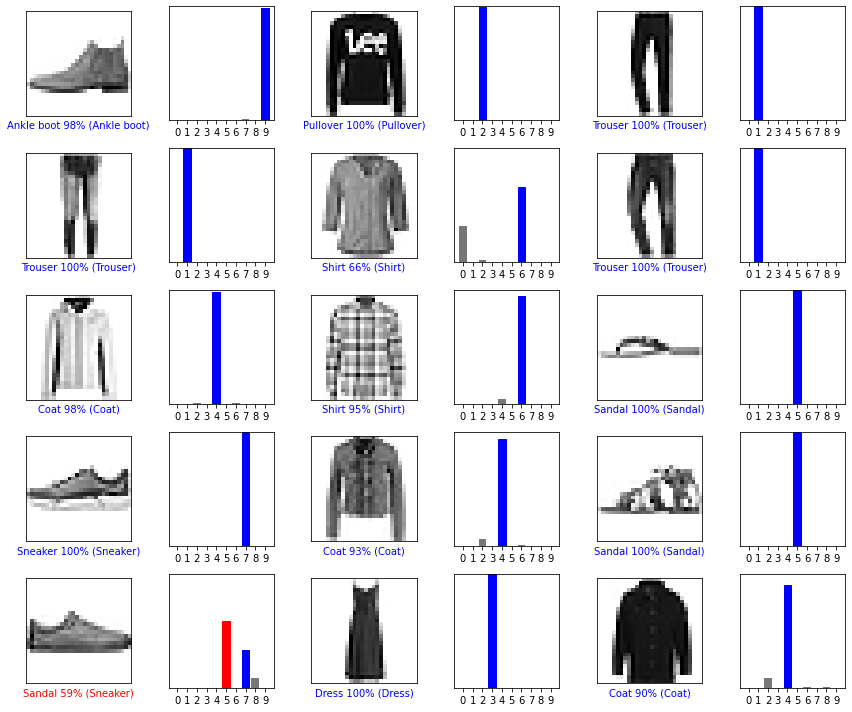

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Write code to use the trained model on a new image in the test set

(28, 28)
(1, 28, 28)
[[2.75642087e-05 9.85682230e-11 9.96726155e-01 8.08735467e-10
  3.13469931e-03 6.92275013e-13 1.11517045e-04 1.61637359e-13
  7.19694304e-09 9.83108885e-13]]


2

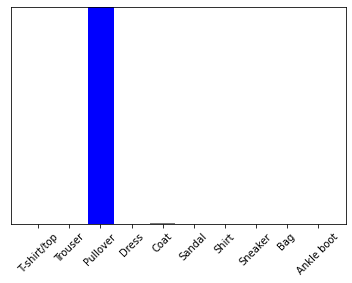

In [ ]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

predictions_single = probability_model.predict(img)
print(predictions_single)

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

np.argmax(predictions_single[0])

See if you can improve the model

## Exercise 2: Predicting the price of a cellphone
We will use simple data of mobile price range classifier. The dataset consists of 20 features and we need to predict the price range in which phone lies. These ranges are divided into 4 classes. 
The features of our dataset include:
*'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height','px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g','touch_screen', 'wifi'*



Before feeding data to our neural network we need it in a specific way so we need to process it accordingly. The preprocessing of data depends on the type of data. Here we will discuss how to handle tabular data and in later tutorials, we will handle image dataset. Let’s start the coding part

In [1]:
#run this only from colaboratory
from google.colab import drive
drive.mount('/content/gdrive')
#files are at: /content/gdrive/My Drive/...

Mounted at /content/gdrive


In [2]:
#Dependencies
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score

#dataset import
dataset = pd.read_csv('/content/gdrive/My Drive/exercises_DL/train.csv') #You need to change #directory accordingly
dataset.head(10) #Return 10 rows of data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,7,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,10,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,0,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,14,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,15,1137,1224,513,19,10,12,1,0,0,0


In [3]:
#Changing pandas dataframe to numpy array
X = dataset.iloc[:,:20].values
y = dataset.iloc[:,20:21].values

Normalize the data and one hot encode the classes

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()

In [8]:
#Normalizing the data
sc = StandardScaler()
X = sc.fit_transform(X)

#one hot encoding
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()

print(y)

[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]


Split data train and test


In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1)

Build the neural network

In [22]:
# Neural network
model = Sequential()
model.add(Dense(16, input_dim=20, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(4, activation='softmax'))

Set up optimizer and loss

In [23]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Train the model

In [24]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
18/18 [==============================] - 0s 2ms/step - loss: 1.7215 - accuracy: 0.2354
Epoch 2/100
18/18 [==============================] - 0s 2ms/step - loss: 1.4966 - accuracy: 0.2986
Epoch 3/100
18/18 [==============================] - 0s 2ms/step - loss: 1.3928 - accuracy: 0.3268
Epoch 4/100
18/18 [==============================] - 0s 2ms/step - loss: 1.3551 - accuracy: 0.3463
Epoch 5/100
18/18 [==============================] - 0s 2ms/step - loss: 1.3141 - accuracy: 0.3774
Epoch 6/100
18/18 [==============================] - 0s 2ms/step - loss: 1.2648 - accuracy: 0.4238
Epoch 7/100
18/18 [==============================] - 0s 2ms/step - loss: 1.2514 - accuracy: 0.4463
Epoch 8/100
18/18 [==============================] - 0s 2ms/step - loss: 1.2054 - accuracy: 0.4630
Epoch 9/100
18/18 [==============================] - 0s 2ms/step - loss: 1.1703 - accuracy: 0.4861
Epoch 10/100
18/18 [==============================] - 0s 2ms/step - loss: 1.1330 - accuracy: 0.4966
Epoch 11/

Check model performance

In [25]:
y_pred = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

Accuracy is: 94.5


See if you can improve the model

##Exercise 3. Build your NN
Let's import packages and load data

In [26]:
import tensorflow as tf
from keras.models import Sequential
import pandas as pd
from keras.layers import Dense
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

data = pd.read_csv('/content/gdrive/My Drive/exercises_DL/diabetes.csv', delimiter=',')
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Prepare the data

In [27]:
labels=data['Outcome']
features = data.iloc[:,0:8]


X=features

y=np.ravel(labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33) 

scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)  



Build the model

In [28]:
model = Sequential()

model.add(Dense(8, activation='relu', input_shape=(8,)))

#your code HERE
model.add(Dense(8, activation='relu', input_shape=(8,)))

model.add(Dense(8, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

Set up the optimizer, loss

In [29]:
#your code HERE
model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

Train the model

In [30]:
#your code HERE
model.fit(X_train, y_train,epochs=5, batch_size=8, verbose=1)

Epoch 1/5
65/65 [==============================] - 1s 2ms/step - loss: 0.6553 - accuracy: 0.6021
Epoch 2/5
65/65 [==============================] - 0s 2ms/step - loss: 0.6062 - accuracy: 0.6702
Epoch 3/5
65/65 [==============================] - 0s 2ms/step - loss: 0.5834 - accuracy: 0.6669
Epoch 4/5
65/65 [==============================] - 0s 2ms/step - loss: 0.5695 - accuracy: 0.6948
Epoch 5/5
65/65 [==============================] - 0s 3ms/step - loss: 0.5561 - accuracy: 0.6992


Run predictions

In [32]:
#your code HERE
y_pred = model.predict(X_test)

#Converting predictions to label

pred = list()

for i in range(len(y_pred)):

    pred.append(1 if y_pred[i] > .5 else 0)

#Converting one hot encoded test label to label

test = list()

for i in range(len(y_test)):

    test.append(1 if y_test[i] > .5 else 0)



a = accuracy_score(pred,test)

print('Accuracy is:', a*100)

Accuracy is: 70.07874015748031
